# Student Performance Dataset Project 

 ## Linear Regression with 1 feature

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import sklearn

# Path to the csv file
data_path = 'student/student-mat.csv'

# Load the data from the file
data = pd.read_csv(data_path, ';')

In [35]:
# Check the data file
data[10:]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
10,0,0,15,1,0,1,4,4,1,2,...,0,0,0,0,0,0,1,0,1,0
11,0,0,15,1,0,1,2,1,3,3,...,1,0,0,0,0,0,1,1,0,0
12,0,1,15,1,1,1,4,4,1,1,...,0,1,0,1,0,0,0,1,0,0
13,0,1,15,1,0,1,4,3,2,2,...,1,0,0,1,0,0,0,0,1,0
14,0,1,15,1,0,0,2,2,1,3,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,1,2,...,0,1,0,1,0,0,0,0,0,1
391,1,1,17,1,1,1,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0
392,1,1,21,0,0,1,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
393,1,1,18,0,1,1,3,2,3,1,...,1,0,0,1,0,0,0,0,1,0


In [3]:
# Load data from column G2 as our features
X = pd.DataFrame({'G2': data.G2})
# Load data from column G3 as our prediction target
Y = data.G3

In [4]:
from sklearn.model_selection import train_test_split

# Create train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [5]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(316, 1) (316,)
(79, 1) (79,)


In [6]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression model
model = linear_model.LinearRegression()

In [7]:
# Train the model with our data
model.fit(X_train, Y_train)

LinearRegression()

In [8]:
# Make a prediction
Y_pred = model.predict(X_test)

In [9]:
# Print the results
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'Mean squared error (MSE): {mean_squared_error(Y_test, Y_pred)}')
print(f'Coefficient of determination (R^2): {r2_score(Y_test, Y_pred)}')

Coefficients: [1.10010317]
Intercept: -1.3375001276800074
Mean squared error (MSE): 5.043837075465401
Coefficient of determination (R^2): 0.7411768661263622


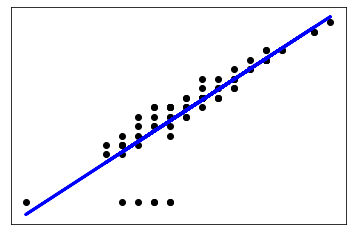

In [10]:
# Plot the graph
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Linear regression with all features

In [11]:
from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder

# Create label encoder with binary attributes
le = LabelEncoder()
binary_data = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for i in binary_data:
    data[i] = le.fit_transform(data[i])

# One hot encode the nominal attributes
data = pd.concat([data, pd.get_dummies(data['Mjob'], prefix='Mjob')], axis=1)
data = data.drop('Mjob', axis=1)
data = pd.concat([data, pd.get_dummies(data['Fjob'], prefix='Fjob')], axis=1)
data = data.drop('Fjob', axis=1)
data = pd.concat([data, pd.get_dummies(data['reason'], prefix='reason')], axis=1)
data = data.drop('reason', axis=1)
data = pd.concat([data, pd.get_dummies(data['guardian'], prefix='guardian')], axis=1)
data = data.drop('guardian', axis=1)

print(f"Data: \n{data[:5]}")

Data: 
   school  sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  \
0       0    0   18        1        0        0     4     4           2   
1       0    0   17        1        0        1     1     1           1   
2       0    0   15        1        1        1     1     1           1   
3       0    0   15        1        0        1     4     2           1   
4       0    0   16        1        0        1     3     3           1   

   studytime  ...  Fjob_other  Fjob_services  Fjob_teacher  reason_course  \
0          2  ...           0              0             1              1   
1          2  ...           1              0             0              1   
2          2  ...           1              0             0              0   
3          3  ...           0              1             0              0   
4          2  ...           1              0             0              0   

   reason_home  reason_other  reason_reputation  guardian_father  \
0            0   

In [12]:
print(data.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')


In [13]:
# Loop through the columns and create new X DataFrame with features
X = pd.DataFrame()
count = 0
for i in data.columns:
    X.insert(count, i, data[i])
    count += 1
print(X.head())

   school  sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  \
0       0    0   18        1        0        0     4     4           2   
1       0    0   17        1        0        1     1     1           1   
2       0    0   15        1        1        1     1     1           1   
3       0    0   15        1        0        1     4     2           1   
4       0    0   16        1        0        1     3     3           1   

   studytime  ...  Fjob_other  Fjob_services  Fjob_teacher  reason_course  \
0          2  ...           0              0             1              1   
1          2  ...           1              0             0              1   
2          2  ...           1              0             0              0   
3          3  ...           0              1             0              0   
4          2  ...           1              0             0              0   

   reason_home  reason_other  reason_reputation  guardian_father  \
0            0          

In [14]:
# Load data from column G3 as our prediction target
Y = data.G3

In [15]:
# Create train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [16]:
print(f"Training set X and Y: {X_train.shape}, {Y_train.shape}")
print(f"Testing set X and Y: {X_test.shape}, {Y_test.shape}")

Training set X and Y: (316, 46), (316,)
Testing set X and Y: (79, 46), (79,)


In [17]:
# Create linear regression model
model = linear_model.LinearRegression()

In [18]:
# Train the model with our data
model.fit(X_train, Y_train)

LinearRegression()

In [19]:
# Make a prediction
Y_pred = model.predict(X_test)

In [20]:
# Print the results
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'Mean squared error (MSE): {mean_squared_error(Y_test, Y_pred)}')
print(f'Coefficient of determination (R^2): {r2_score(Y_test, Y_pred)}')

Coefficients: [-2.63799309e-16  8.05224088e-16  7.23260723e-17 -1.33103774e-15
 -3.36852169e-17  6.52581226e-16 -2.50841959e-16 -8.54570220e-16
 -1.22784142e-16 -5.24275836e-16  3.25526446e-17  7.75574822e-17
  7.06628806e-16 -2.07684607e-16  1.89881965e-16 -4.37944318e-17
  7.46331969e-16 -3.22187637e-16 -2.88745461e-16 -1.26817415e-16
  3.29920555e-16 -6.55956931e-17 -2.58253321e-16  1.15013451e-16
 -3.71288589e-16 -1.38740841e-16  7.94893830e-17 -1.75763550e-15
  1.00000000e+00 -1.43952853e-16  1.45759449e-16  3.76227151e-17
  4.43649352e-16  4.64417350e-17  6.36482113e-17  1.42561679e-16
  7.10697757e-16  3.66690685e-17 -2.20741306e-16 -2.23155828e-17
 -4.78595382e-17  9.45730075e-16 -2.24846380e-16  4.85307716e-17
  2.29586828e-16 -6.14219008e-16]
Intercept: 3.375077994860476e-14
Mean squared error (MSE): 1.1396541826776554e-28
Coefficient of determination (R^2): 1.0


## Classification

In [21]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0


In [22]:
# Create new binary attribute 'passed' based on the final grade,1 passed, 0 failed
processed_data = data[:]
# processed_data['G1'] = processed_data['G1']/20
# processed_data['G2'] = processed_data['G2']/20
processed_data['G3'] = processed_data['G3']/20
processed_data['passed'] = [1 if x >= 0.5 else 0 for x in processed_data['G3']]
Y_c = processed_data['passed']
Y_c.shape

(395,)

In [23]:
# Create train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_c, test_size=0.2)

In [24]:
print(f"Training set X and Y: {X_train.shape}, {Y_train.shape}")
print(f"Testing set X and Y: {X_test.shape}, {Y_test.shape}")

Training set X and Y: (316, 46), (316,)
Testing set X and Y: (79, 46), (79,)


In [25]:
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression model
clf = LogisticRegression(max_iter=200).fit(X_train, Y_train)

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score

# Make a prediction
clf_pred = clf.predict(X_test)

acc = accuracy_score(clf_pred, Y_test)
preci = precision_score(clf_pred, Y_test)
recall = recall_score(clf_pred, Y_test)
f1 = f1_score(clf_pred, Y_test)
mean = mean_squared_error(Y_test, clf_pred)

In [27]:
# Print the results
print(f"Accuracy: {acc}")
print(f"Precision: {preci}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")
print(f"MSE: {mean}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
MSE: 0.0


## PCA

I was trying not to copy paste your code so I created a few models to compare the score and noise variance.

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

# Load data for X and Y
pca_y = data['G3']
pca_x = data.drop(['G3'], axis=1)

pca_x_norm = normalize(pca_x)

pca = PCA().fit(pca_x)

# Create PCA models
pca0 = PCA(n_components=29)
pca1 = PCA(n_components=26)
pca2 = PCA(n_components=17)
pca3 = PCA(n_components=10)

# Fit the models
pca0.fit(pca_x)
pca1.fit(pca_x)
pca2.fit(pca_x)
pca3.fit(pca_x)

PCA(n_components=10)

Text(0, 0.5, 'Variance explained')

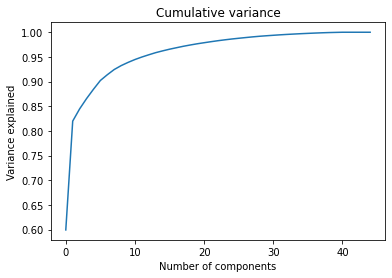

In [29]:
#Plotting cumulative variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative variance')
plt.xlabel('Number of components')
plt.ylabel('Variance explained')

In [30]:
cumvar = np.cumsum(pca0.explained_variance_ratio_)

In [31]:
cumvar[20]

0.9787623973717708

In [32]:
# Transform the data
X_pca0 = pca0.transform(pca_x_norm)
X_pca1 = pca1.transform(pca_x_norm)
X_pca2 = pca2.transform(pca_x_norm)
X_pca3 = pca3.transform(pca_x_norm)
print(f"New Dataset size after transformations: \n PCA0: {X_pca0.shape}\n PCA1: {X_pca1.shape}\
        \n PCA2: {X_pca2.shape}\n PCA3: {X_pca3.shape}")

New Dataset size after transformations: 
 PCA0: (395, 29)
 PCA1: (395, 26)        
 PCA2: (395, 17)
 PCA3: (395, 10)


In [33]:
print("PCA(29-components) explained variance ratio:",np.cumsum(pca0.explained_variance_ratio_)[28])
print("PCA(26-components) explained variance ratio:",np.cumsum(pca1.explained_variance_ratio_)[25])
print("PCA(17-components) explained variance ratio:",np.cumsum(pca2.explained_variance_ratio_)[16])
print("PCA(17-components) explained variance ratio:",np.cumsum(pca3.explained_variance_ratio_)[9])

PCA(29-components) explained variance ratio: 0.9918315638930737
PCA(26-components) explained variance ratio: 0.9877930097406604
PCA(17-components) explained variance ratio: 0.9686232791399693
PCA(17-components) explained variance ratio: 0.9388521191362751
